In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats
import glob
import pymesh
from sklearn import decomposition

# Interpolando vertices

In [102]:
data = pd.read_csv("../../Datos/data_artificial_cites/landmarking_600f&m.csv",sep=",",header=0,index_col=0,nrows=450)
#data = pd.read_csv("../../Datos/data_artificial_cites/landmarks_reales.csv",sep=",",header=0,index_col=0)

In [103]:
data.columns

Index(['id', 'cloud_X', 'cloud_Y', 'cloud_Z', 'S000_X', 'S001_X', 'S002_X',
       'S003_X', 'S004_X', 'S005_X', 'S006_X', 'S007_X', 'S008_X', 'S009_X',
       'S010_X', 'S011_X', 'S012_X', 'S013_X', 'S014_X', 'S000_Y', 'S001_Y',
       'S002_Y', 'S003_Y', 'S004_Y', 'S005_Y', 'S006_Y', 'S007_Y', 'S008_Y',
       'S009_Y', 'S010_Y', 'S011_Y', 'S012_Y', 'S013_Y', 'S014_Y', 'S000_Z',
       'S001_Z', 'S002_Z', 'S003_Z', 'S004_Z', 'S005_Z', 'S006_Z', 'S007_Z',
       'S008_Z', 'S009_Z', 'S010_Z', 'S011_Z', 'S012_Z', 'S013_Z', 'S014_Z'],
      dtype='object')

In [104]:
ids = np.array(data['id'])
cloud_Xs = np.array(data['cloud_X'])
cloud_Ys = np.array(data['cloud_Y'])
cloud_Zs = np.array(data['cloud_Z'])

In [105]:
def from_string(a):
    return np.fromstring(a,sep=" ")

In [106]:
Xs = np.array(list(map(lambda x: from_string(x),cloud_Xs)))
Ys = np.array(list(map(lambda x: from_string(x),cloud_Ys)))
Zs = np.array(list(map(lambda x: from_string(x),cloud_Zs)))

In [107]:
shapes_Xs = np.array(list(map(lambda x: np.shape(x),Xs)))

In [108]:
min_shape = shapes_Xs.flatten().min()

In [109]:
min_shape

67290

In [111]:
def compl(a):
    #b = np.unique(np.random.randint(a.shape[0],size=100000))
    #return a[np.random.choice(b, 10000)]}
    return a[random.sample(range(a.shape[0]),67290)]

In [112]:
import random

In [113]:
values = np.array(list(map(lambda x: compl(np.column_stack((Xs[x],Ys[x],Zs[x]))),range(450))))

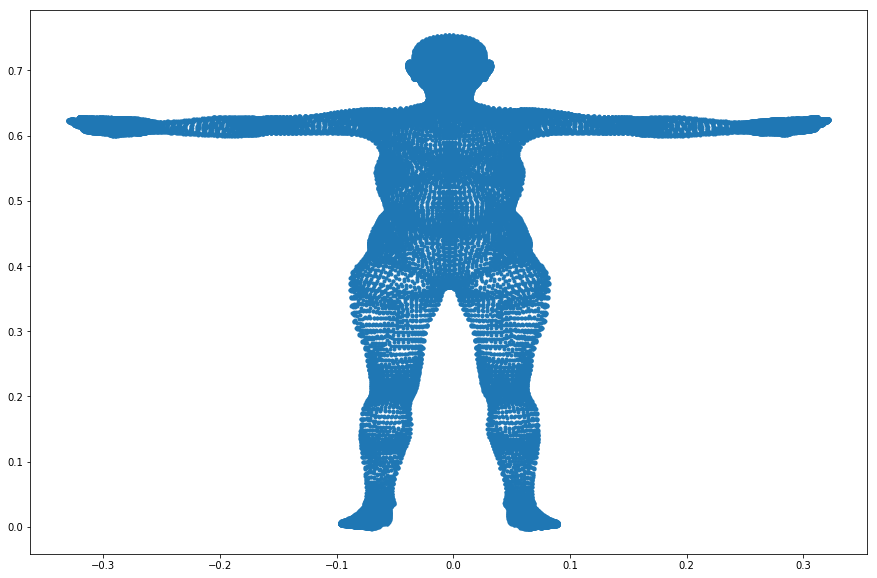

In [114]:
plt.plot(values[100][:,0],values[100][:,1],".")
plt.show()

In [115]:
del data,Xs,Ys,Zs

In [116]:
del cloud_Xs,cloud_Ys,cloud_Zs

In [117]:
del shapes_Xs

In [118]:
values = values.reshape((values.shape[0],values.shape[1]*values.shape[2]))

In [119]:
values.shape

(450, 201870)

# Reducción de dimensionalidad PCA 

In [142]:
pca = decomposition.PCA(n_components=500,svd_solver='randomized',whiten=True)
pca.fit(values)
print("Con n_components = {} el valor es: {} ".format(100,pca.explained_variance_ratio_.sum()))

Con n_components = 100 el valor es: 0.9999999999999998 


In [ ]:
x_out = pca.transform(values)
x_out.shape

In [ ]:
pca.explained_variance_ratio_[0:2].sum()

In [164]:
from sklearn.preprocessing import MinMaxScaler

In [165]:
X = MinMaxScaler().fit_transform(values)

In [170]:
X.shape

(450, 201870)

0.10722676247353977

In [167]:
def sexo(x):
    if x.find('F') != -1:
        return 'F'
    else:
        return 'M'

In [168]:
sexo_ids = np.array(list(map(lambda x: sexo(x),ids))) 

In [169]:
interest_feat = range(10)
data = pd.DataFrame(x_out)
data["labels"]= sexo_ids
color_wheel = {"F": "red", "M": "blue"}
colors = data["labels"].map(lambda x: color_wheel.get(x))
pd.scatter_matrix(data.loc[:,interest_feat[:-1]], figsize=(12,8), diagonal='kde',label=data.loc[:,"labels"],c=colors)
plt.show()

KeyboardInterrupt: 

In [ ]:
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out[:,0],x_out[:,1],marker="o",c=colors)
plt.show()

# Prediciendo

In [171]:
import sklearn
from sklearn.svm import SVC

In [172]:
id_sexo = {"F": 0, "M": 1}
sexo_c = data["labels"].map(lambda x: id_sexo.get(x)).tolist()

In [173]:
#X = x_out[:]
y = sexo_c

In [174]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split( X, y, test_size=0.30, random_state=42)

In [175]:
clf = SVC()
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [176]:
clf.score(X_test,y_test)

0.6962962962962963

In [177]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
clf = ExtraTreesClassifier(n_estimators=200,
                           max_features=0.3,
                           #max_depth=4, #20
                           random_state=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.53      0.70        73
          1       0.65      1.00      0.78        62

avg / total       0.84      0.75      0.74       135



In [178]:
clf.score(X_test,y_test)

0.74814814814814812

In [179]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)

KeyboardInterrupt: 

In [ ]:
scores.mean()

In [ ]:
scores.std()

In [ ]:
scores

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

y_pred = clf.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["mujeres","hombres"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["mujeres","hombres"], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

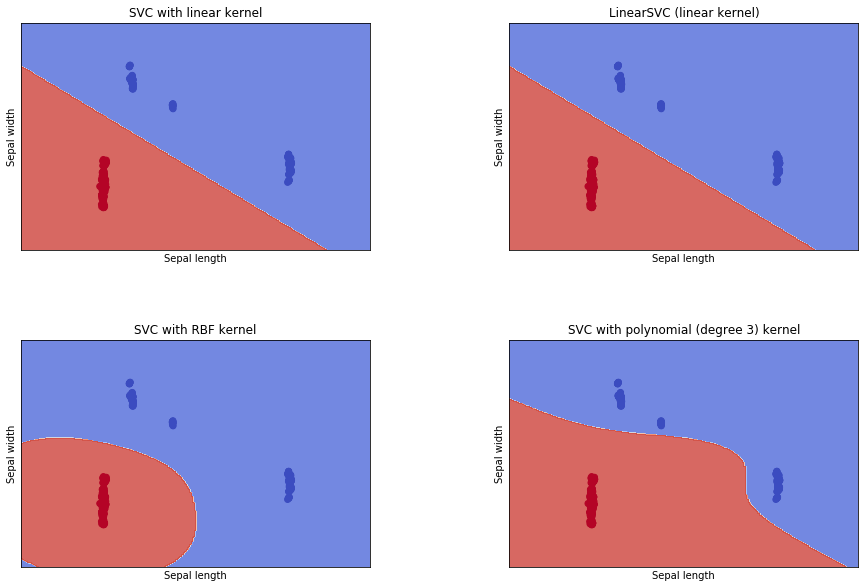

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features. We could
#                       # avoid this ugly slicing by using a two-dim dataset
# y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()